# Ejemplo 1: Anotando gráficas

## 1. Objetivos:
- Aprender a añadir títulos, anotaciones y leyendas a nuestras gráficas
- Aprender a cambiar los tamaños de nuestras gráficas y modificar la dirección de nuestros tics
 
---
    
## 2. Desarrollo:

Vamos a aprender a añadir anotaciones a nuestras gráficas para que sean mucho más comprensibles.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

In [2]:
df = pd.read_csv('../../Datasets/athlete_olympic_events-cleann.csv')

df.head()

,athlete_id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
0,120585,Nadiya Volodymyrivna Tkachenko (-Sapronova),F,23,165,74.0,Soviet Union,URS,1972 Summer,1972,Summer,Munich,Athletics,Athletics Women's Pentathlon,None
1,124576,"Cornelia Maria ""Cocki"" van Engelsdorp Gastelaa...",F,22,170,67.0,Netherlands,NED,1960 Summer,1960,Summer,Roma,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,None
2,88962,"Gunhild Margareta ""Gun"" Olsson (-Eriksson)",F,26,166,57.0,Sweden,SWE,1972 Summer,1972,Summer,Munich,Athletics,Athletics Women's 4 x 100 metres Relay,None
3,82254,Jason Newth Morris,M,25,178,80.0,United States,USA,1992 Summer,1992,Summer,Barcelona,Judo,Judo Men's Half-Middleweight,Silver
4,106442,Carlos A. Scanavino Villavicenio,M,24,187,80.0,Uruguay,URU,1988 Summer,1988,Summer,Seoul,Swimming,Swimming Men's 200 metres Freestyle,None


Añadir títulos y nombres para nuestros ejes es tan fácil como llamar el método `set`. Anteriormente habíamos estado llamando nuestros métodos de Seaborn sin asignar los resultados a ninguna variable. Si asignamos nuestro resultado a la variable `ax`, podemos ahora llamar el método `set` de esa variable para anotar nuestra gráfica:

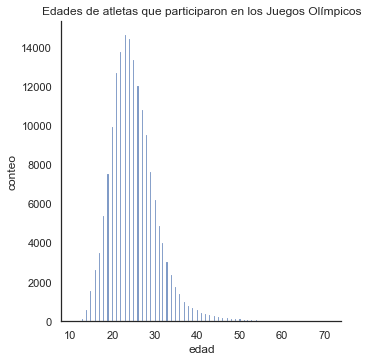

In [3]:
ax = sns.displot(df['age'], kde=False)
ax.set(title='Edades de atletas que participaron en los Juegos Olímpicos', xlabel='edad', ylabel='conteo');

Observa que he colocado un punto y coma al final de la última línea. Esto se hace para que Jupyter Notebooks no me muestre el output de la última línea, ya que esto ensuciaría un poco mi visualización.

En el caso de que tengamos dos o más gráficas (o categorías) al mismo tiempo, podemos añadir una leyenda a nuestra gráfica para poder diferenciar nuestros datos:

In [4]:
by_athlete = df.groupby(level=0)[['age', 'height', 'weight']].mean()
sex = df.groupby(level=0)['sex'].last()
merged = by_athlete.merge(sex, left_index=True, right_index=True)
males = by_athlete[merged['sex'] == 'M']
females = by_athlete[merged['sex'] == 'F']

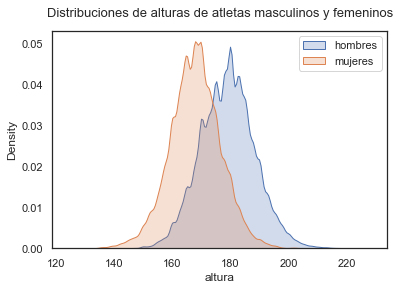

In [9]:
ax = sns.kdeplot(males['height'], label='hombres',shade=True)
sns.kdeplot(females['height'],shade=True, ax=ax, label='mujeres')
ax.set_title('Distribuciones de alturas de atletas masculinos y femeninos', fontsize=13, pad=15);
ax.set(xlabel='altura');
ax.legend(loc='upper right');

En la gráfica anterior usamos el método `set_title` en vez del genérico `set` para poder agregar el tamaño de la letra (`fontsize`) y el tamaño de la separación entre el título y la gráfica (`pad`).

---

También podemos cambiar el tamaño de nuestras gráficas. Para eso tendremos que echar mano de la biblioteca sobre la cual está construida `seaborn`: `matplotlib`. `matplotlib` es la biblioteca de visualizaciones en Python más conocida y utilizada. Algunas de las nuevas bibliotecas que son muy famosas, como `seaborn` están construidas sobre `matplotlib`. Esto quiere decir que para poder acceder a todo el poder de las visualizaciones en Python es importante saber cómo funcionan ambas.

Por ahora sólo vamos a ver lo siguiente:

Cada vez que creas una nueva gráfica con `seaborn`, esta gráfica está contenida dentro de algo que llamamos `figures` en `matplotlib`. Una `figure` puede contener múltiples gráficas. Cada que generas una gráfica con `seaborn`, una nueva `figure` se genera automáticamente. Podemos generar manualmente la `figure` para después utilizarla para personalizar nuestra gráfica. Para determinar el tamaño de nuestra gráfica podemos hacer lo siguiente:

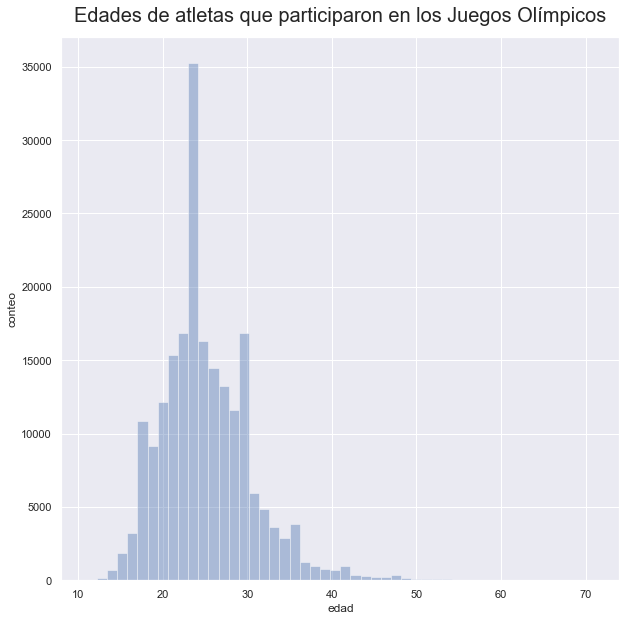

In [23]:
sns.set(rc={'figure.figsize':(10,10)})
ax = sns.distplot(df['age'], kde=False, norm_hist=False)
ax.set_title('Edades de atletas que participaron en los Juegos Olímpicos', fontsize=20, pad=15)
ax.set(xlabel='edad', ylabel='conteo');

A través de todo el módulo, iremos poco a poco viendo cómo modificar nuestras gráficas para que se vean bien y sean más comprensibles.